# Variables

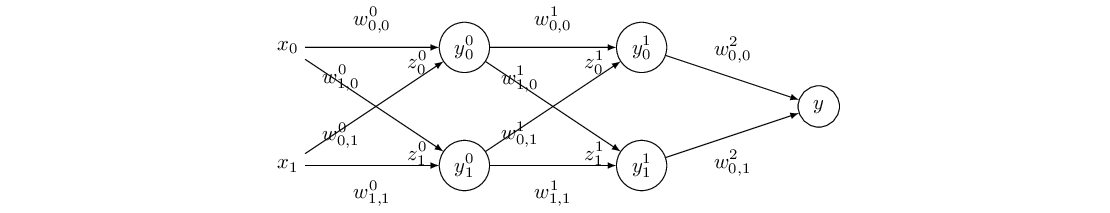</p>


## Définition d'une variable

Une variable possède 3 propriétés:  
- un **nom** (exemple : `x`)  
- une **valeur** (exemple : 42)  
- un **type** (exemple : entier)

En OCaml, on définit une variable de la façon suivante :
```ocaml
let variable = valeur
```

Par exemple, pour définir une variable `x` valant 42 :

In [1]:
let x = 42

val x : int = 42


OCaml nous répond que `x` a pour valeur 42 et est de type `int` (*integer*, c'est à dire entier).
La variable `x` est ici définie globalement, c'est à dire accessible partout dans ce notebook.

On peut alors faire des calculs avec la valeur de `x` :

In [2]:
3*x - 2 (* OCaml remplace x par 42 et fait le calcul *)

- : int = 124


Il est possible d'avoir une expression (un calcul) à droite d'une définition :

In [3]:
let a = 1 + 2 + 3 + 4 (* la valeur à droite de = est calculée puis mise dans a *)

val a : int = 10


**Exercice** : définissez une variable $a$ égale à 752. Puis définissez une variable $b$ égale à $54a$.    
Rappel : vous pouvez appuyer sur la touche B pour faire apparaître une case de code et répondre dedans. Ici vous pouvez utiliser deux cases, ou séparer les deux instructions avec ` ;;`.

In [4]:
let a = 752;;
let b = 54*a;;

val a : int = 752


## Variables locales

Il est possible de définir une **variable locale** en utilisant la forme `let y = ... in ...`  
`y` existe est alors seulement dans le in (`...`)

In [5]:
let y = -1 in y (* y est accessible dans le in *)

- : int = -1


In [6]:
y (* utiliser y ici donne une erreur  *)

error: compile_error

**Exercice** : en utilisant `let ... in ... `, définissez une variable $a$ égale à $752$, puis définissez une variable $b$ égale à $54a$.    

In [7]:
let a = 752 in
let b = 54*a in
b

- : int = 40608


**Remarque** Il est possible d'utiliser des parenthèses ou `begin ... end` pour délimiter le in :
```ocaml
let a = 3 in
(
...
)
```


## Opérations numériques

Nous avons déjà vu l'addition et la soustraction de 2 entiers. Il est aussi possible de multiplier :

In [8]:
3 * 14

- : int = 42


On peut effectuer la division **entière** (ou encore : [quotient de la division euclidienne](https://fr.wikipedia.org/wiki/Division_euclidienne)) de 2 entiers :

In [9]:
3 / 2 (* division entière *)

- : int = 1


La division entière de $x$ par $y$ est, par définition, la partie entière de $\frac{x}{y}$.  
Dans l'exemple ci-dessus, `3 / 2` est donc la partie entière de $\frac{3}{2} = 1.5$, c'est à dire $1$. 

**Attention** : la division entière ` 3 / 2`  en OCaml correspond à ` 3 // 2 ` en Python.

En plus des entiers (`int`), OCaml permet de définir des nombres à virgules (`float`, pour flottant) :

In [10]:
let pi = 3.141592

val pi : float = 3.141592


Les opérateurs d'addition, soustraction, multiplication, division doivent s'utiliser avec un `.` (point). Par exemple :

In [11]:
pi +. 2.618 (* noter le . après + *)

- : float = 5.759592


**Attention** : c'est le point (.) et non pas la virgule qui est utilisé pour les flottants.

Il est possible de calculer $x^y$, où $x$ et $y$ sont des **flottants** avec `**` :

In [12]:
2.718 ** 3.14 (* x puissance y *)

- : float = 23.0963461891915607


Il n'est pas possible d'utiliser `**` sur des `int`. Par contre on peut utiliser 4.0 ou 4. au lieu de 4 pour avoir des flottants et utiliser `**` : 

In [13]:
2. ** 10.

- : float = 1024.


**Exercice**
1. Stocker la valeur $42^2$ dans une variable $a$, en utilisant `*`.
2. En déduire la valeur de $42^4$.
3. Calculer la valeur de $2^{10}$ en utilisant le moins de multiplications possibles.

In [14]:
(* 1. *) 
let a = 42*42;;


(* 2. *)
a*a;;

(* 3. *)
let deux_puiss_2 = 2*2 in
let deux_puiss_4 = deux_puiss_2*deux_puiss_2 in
let deux_puiss_8 = deux_puiss_4*deux_puiss_4 in
deux_puiss_8 * deux_puiss_2;; (* calcul de 2 puissance 10 en 4 multiplications *)

val a : int = 1764


**Exercice**

1. Stocker dans 3 variables $a$, $b$, $c$ les valeurs 2, 5 et 3. On pourra utiliser let a, b, c = ..., ..., ... pour définir 3 variable simultanément. 
2. Stocker dans une variable $delta$ le discriminant de l'équation $ax^2 + bx + c = 0$.
3. Calculer toutes les solutions de l'équation précédente.

In [15]:
(* 1. *)
let a, b, c = 2., 6., 3.;;

val a : float = 2.
val b : float = 6.
val c : float = 3.


In [16]:
(* 2. *)
let delta = b**2. -. 4.*.a*.c;;

val delta : float = 12.


In [17]:
(* 3. Le discriminant étant positif, il y a deux solutions égales à : *)
(-.b -. sqrt delta)/.(2.*.a);;
(-.b +. sqrt delta)/.(2.*.a);;

- : float = -2.36602540378443837


- : float = -0.633974596215561403


Une autre opération importante est le **modulo** (ou : [reste de la division euclidienne](https://fr.wikipedia.org/wiki/Division_euclidienne)) de 2 entiers `a` et `b`, notée `a mod b` en OCaml. Mathématiquement, il s'agit de l'entier $r$ vérifiant :
$$a = bq + r$$
$$0 \leq r < b$$

($q$ est le quotient, égal à `a / b` en OCaml)  
Cette opération `mod` sert notamment à tester la divisibilité : `a` est divisible par `b` si et seulement si `a mod b = 0`.

**Exercice** : Est-ce que 527 est divisible par 17?

In [18]:
527 mod 17 (* c'est égal à 0 donc 17 divise bien 527 *)

- : int = 0


## Overflow

L'ordinateur stocke toutes les variables dans la mémoire RAM de l'ordinateur, en binaire (suite de 0 et de 1). Comme la mémoire RAM sur un ordinateur n'est pas infinie, on ne peut pas stocker des nombres de taille arbitraire.  
`max_int` est le plus grand entier que l'on peut stocker dans une variable :

In [19]:
max_int

- : int = 4611686018427387903


Si on dépasse cet entier (ce qu'on appelle **integer overflow**), on tombe sur le plus petit entier représentable :

In [20]:
max_int + 1

- : int = -4611686018427387904


Le dépassement d'entier est une source fréquente de bug, qui a causé par exemple le [crash de la fusée Ariane 5](https://fr.wikipedia.org/wiki/Vol_501_d%27Ariane_5).

Les float sont également limités :

In [21]:
max_float

- : float = 1.79769313486231571e+308


Les flottants sont codées suivant la norme [IEEE754](https://fr.wikipedia.org/wiki/IEEE_754) sous la forme scientifique en utilisant 64 bits (sur un processeur 64 bits) dont 52 bits pour les chiffres après la virgule.  
La précision des flottants est donc limitée : par exemple, on ne peut pas stocker $\sqrt{2}$ ou $\pi$ de façon exacte sur l'ordinateur puisqu'il s'agit de nombres irrationnels (c'est à dire avec une infinité de décimales, qui ne se répètent pas).  

In [22]:
2.**0.5 (* seulement une partie des décimales est stockée *)

- : float = 1.41421356237309515


In [23]:
(2.**0.5)**2.0  (* ne donne pas 2.0 à cause des erreurs d'arrondis *)

- : float = 2.00000000000000044


Le calcul de $\sqrt 2$ par OCaml s'arrête à la 16ème décimale (ce qui correspond à 52 bits après la virgules, puisque $2^{-52}$ est du même ordre de grandeur que $10^{-16}$). Ce nombre $2^{-52}$ est appelé **epsilon machine**.

Autre exemple :

In [24]:
0.1 +. 0.2  (* ne donne pas 0.3 *)

- : float = 0.300000000000000044


`O.1` n'étant pas représentable de façon exacte en base 2, il est tronqué et engendre des erreurs d'arrondis.

La plus grande valeur de l'exposant est 1023 :

In [25]:
2.**1023.

- : float = 8.98846567431158e+307


In [26]:
2.**1024.

- : float = infinity


## Unit

Il existe une valeur spéciale `()` qui signifie "rien" (un peu comme le None de Python). Le type de `()` est `unit`. Par exemple, afficher un entier avec `print_int` fait un effet de bord (affichage sur l'écran) mais ne renvoie pas de valeur :

In [27]:
print_int 42

- : unit = ()


Pour que le résultat s'affiche, il faut revenir à la ligne avec `print_newline` :

In [28]:
print_newline ()

42


- : unit = ()


On verra dans un prochain cours le fonctionnement plus détaillé de `print_newline`.

Il aurait été possible de combiner ces deux instructions avec `;`, qui permet d'exécuter consécutivement plusieurs instructions :

In [29]:
print_int 31;
print_newline ()

31


- : unit = ()


`;;` est similaire à `;`, mais permet de séparer complètement plusieurs instructions, ce qui signifie que les variables définies avec `in` ne sont plus accessibles :

In [30]:
let a = 3 in
print_int a;
a (* a reste accessible : il est toujours dans le in *)

- : int = 3


In [31]:
let a = 3 in
print_int a;;
a;; (* a n'est pas accessible ici *)

- : unit = ()


- : float = 2.


## Présentation du code

Contrairement à Python, l'indentation du code n'a pas d'importance en OCaml. En effet les espaces et sauts de lignes sont ignorés :

In [32]:
let a 
  = 
      6 (* indentation n'importe comment *)

val a : int = 6


On veillera toutefois à écrire du code aussi clair et lisible que possible.

## Réferences

Contrairement à ce que son nom l'indique, une variable définie comme on l'a fait jusqu'à maintenant est en fait... **constante** :

In [33]:
let x = 3;;
x = 4;; (* ceci ne MODIFIE pas x, mais teste si la valeur de x est 4 *)
x;; (* x vaut toujours 3 : il ne peut pas être modifié *)

val x : int = 3


- : bool = false


- : int = 3


Pour pouvoir modifier une variable, on peut utiliser une **référence**.
Pour définir une référence on utilise `ref` :
```ocaml
let variable = ref valeur (* définition d'une référence *)
```
Pour modifier une référence on utilise `:=` :
```ocaml
variable := valeur (* modification d'une référence *)
```
Pour obtenir la valeur d'une référence on utilise `!` :
```ocaml
!variable (* donne la valeur d'une référence *)
```

In [34]:
let x = ref 3;; (* définie une variable x qui "pointe" vers un emplacement mémoire contenant 3 *)
x := 4;; (* modifie la valeur pointé par x avec := *)
!x;; (* la valeur a bien été modifiée *)

val x : int ref = {contents = 3}


- : unit = ()


- : int = 4


On remarque que l'instruction `x := 4` a pour valeur de retour `()` : c'est un effet de bord qui modifie `x` mais ne renvoie pas de résultat.

Une référence `a` stocke en fait une adresse mémoire. La valeur de `a` est stockée dans cette adresse mémoire (et c'est cette valeur qui est modifiée avec `a := ...`).  
**Remarque** : on reverra cette idée avec les pointeurs en C.

<center><img src=img/ref.drawio.png width=300></center>

**Exercice** : Que valent `!x` et `!y` après avoir exécuté le bout de code suivant? À quoi sert ce code?
```ocaml
let x = ref 5;;
let y = ref 27;;
x := !x + !y;
y := !x - !y;
x := !x - !y
```

In [35]:
let x = ref 5 in
let y = ref 27 in
x := !x + !y;
y := !x - !y;
x := !x - !y;
!x, !y;; (* x vaut 27, y vaut 5 : ce bout de code échange les valeurs de x et y *)

- : int * int = (27, 5)


**Remarque** : utiliser des `ref` rend souvent le code plus compliqué, on n'en utilisera que lorsque c'est nécessaire.